In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
import folium 

from scipy.stats import norm
from scipy import stats

In [2]:
path = '../Warren/cleaned_df'
df = pd.read_csv(path,index_col=0)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,reno,price_per_sqft,year,day,month,season,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,188.050847,2014.0,13.0,10.0,fall,8260,0.428571,1392400,1.0000
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1,209.338521,2014.0,9.0,12.0,winter,17990,0.428571,6604900,5.0625
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,233.766234,2015.0,25.0,2.0,winter,4620,0.500000,592900,1.0000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,308.163265,2014.0,9.0,12.0,winter,13720,0.714286,3841600,9.0000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,303.571429,2015.0,18.0,2.0,winter,13440,0.375000,2822400,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,0,235.294118,2014.0,21.0,5.0,spring,12240,0.375000,2340900,6.2500
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,0,173.160173,2015.0,23.0,2.0,winter,18480,0.375000,5336100,6.2500
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,0,394.216667,2014.0,23.0,6.0,summer,7140,0.428571,1040400,0.5625
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,0,250.000000,2015.0,16.0,1.0,winter,12800,0.375000,2560000,6.2500


In [3]:
df.drop('id', axis=1, inplace=True)

In [4]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,reno,price_per_sqft,year,day,month,season,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0,188.050847,2014.0,13.0,10.0,fall,8260,0.428571,1392400,1.0000
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,1,209.338521,2014.0,9.0,12.0,winter,17990,0.428571,6604900,5.0625
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0,233.766234,2015.0,25.0,2.0,winter,4620,0.500000,592900,1.0000
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,0,308.163265,2014.0,9.0,12.0,winter,13720,0.714286,3841600,9.0000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0,303.571429,2015.0,18.0,2.0,winter,13440,0.375000,2822400,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,...,0,235.294118,2014.0,21.0,5.0,spring,12240,0.375000,2340900,6.2500
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,...,0,173.160173,2015.0,23.0,2.0,winter,18480,0.375000,5336100,6.2500
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,...,0,394.216667,2014.0,23.0,6.0,summer,7140,0.428571,1040400,0.5625
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,...,0,250.000000,2015.0,16.0,1.0,winter,12800,0.375000,2560000,6.2500


In [5]:
df.corrwith(df["price"]).map(abs).sort_values(ascending=False)

price                      1.000000
sqft_living_times_grade    0.743376
sqft_living_sq             0.695189
sqft_living                0.693781
grade                      0.677931
sqft_living15              0.598729
sqft_above                 0.597644
price_per_sqft             0.559654
bathrooms_sq               0.548383
bathrooms                  0.519674
view                       0.392937
lat                        0.323237
condition_div_grade        0.314446
bedrooms                   0.312065
sqft_basement              0.310148
floors                     0.266271
waterfront                 0.235674
yr_renovated               0.115557
reno                       0.115229
sqft_lot                   0.092868
sqft_lot15                 0.084955
yr_built                   0.053060
zipcode                    0.050749
condition                  0.039385
long                       0.025760
month                      0.013505
day                        0.013033
year                       0

C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1080x576 with 0 Axes>

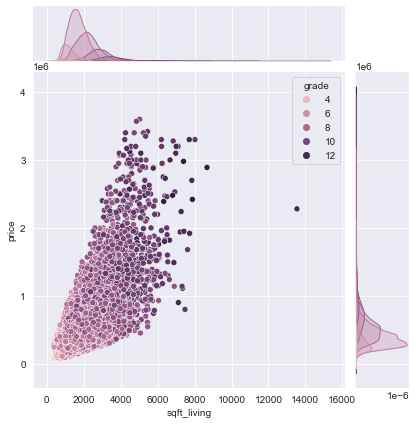

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.jointplot(x='sqft_living',y='price', data=df,hue='grade')
plt.savefig('..\..\..\images\sqft_living_price.jpg')

C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1080x576 with 0 Axes>

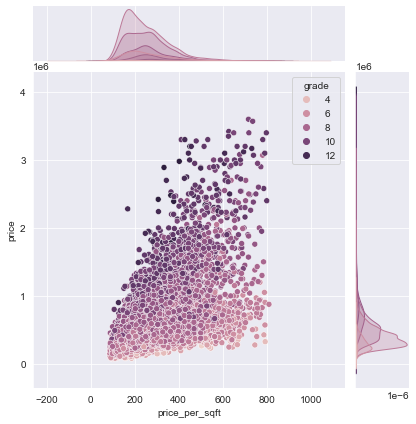

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.jointplot(x='price_per_sqft',y='price', data=df,hue='grade')
plt.savefig('..\..\..\images\price_per_sqft_price.jpg')

<Figure size 1080x576 with 0 Axes>

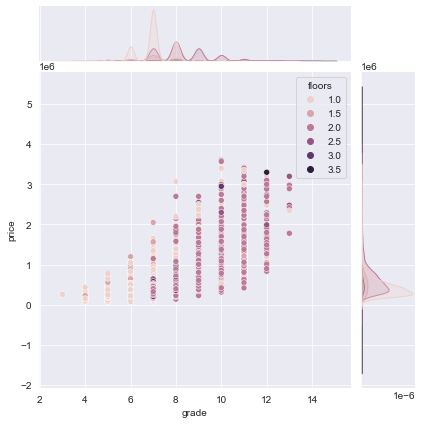

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.jointplot(x='grade',y='price', data=df,hue='floors')
plt.savefig('..\..\..\images\grade_price.jpg')

C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


OSError: [Errno 22] Invalid argument: '..\\..\\..\\images\x08athrooms_price.jpg'

<Figure size 1080x576 with 0 Axes>

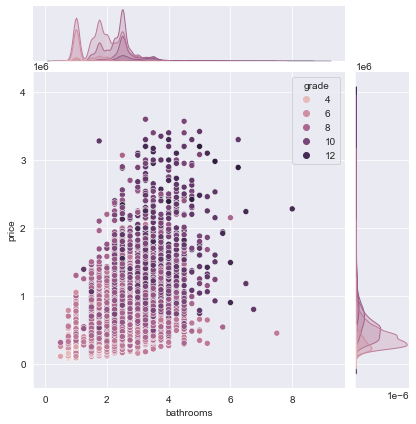

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.jointplot(x='bathrooms',y='price', data=df,hue='grade')
plt.savefig('..\..\..\images\bathrooms_price.jpg')